<div class="alert alert-block alert-info">
<center> <h1>  ABCDEats Inc.
</h1> Segmentation problem</center> <br>
<center> Data Mining Project </center>

<center>Group 99 </center>

Hugo Fonseca, number: xxxxx <br>
Jéssica Vicente, number: 20230744   <br>
Ricardo Pereira, number: xxxxx   <br>

#### Metadata:

- customer_id: Unique identifier for each customer.
- customer_region: Geographic region where the customer is located.
- customer_age: Age of the customer.
- vendor_count: Number of unique vendors the customer has ordered from.
- product_count: Total number of products the customer has ordered
- is_chain: Indicates whether the customer’s order was from a chain restaurant.
- first_order: Average number of days before arrival date the customer makes bookings
- last_order: Number of days from the start of the dataset when the customer most recently placed an order.
- last_promo: The category of the promotion or discount most recently used by the customer.
- payment_method: Method most recently used by the customer to pay for their orders.
- CUI_American, CUI_Asian,CUI_Chinese, CUI_Italian, etc.: The amount in monetary units spent by the customer from the indi- cated type of cuisine.
- DOW_0 to DOW_6: Number of orders placed on each day of the week (0 = Sunday, 6 = Saturday).
- HR_0 to HR_23: Number of orders placed during each hour of the day (0 = midnight, 23 = 11 PM)
each booking, multiplied by the number of Nights (Length-of-stay) of the booking


# Packages and global definitions

In [4]:
'''
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
'''

"\nnltk.download('stopwords')\nnltk.download('wordnet')\nnltk.download('punkt')\n"

In [6]:
# Packages
import os
import re
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import copy
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import WordNetLemmatizer
from kneed import KneeLocator
from wordcloud import WordCloud 
from sklearn.preprocessing import MinMaxScaler
import networkx as nx
from numpy import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import random
from numpy.linalg import norm
import warnings
warnings.filterwarnings("ignore")

In [7]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

plots_barTexts_fontSize = 8

# Source: professor's notebook

In [8]:
# Load data 
data = pd.read_csv("DM2425_ABCDEats_DATASET.csv", header=0)
data

# Source: previous project notebook

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,f4e366c281,8670,30.0,1,1,1,NaN,0,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0
31884,f6b6709018,8670,NaN,1,1,0,NaN,0,DELIVERY,DIGI,...,0,0,1,0,0,0,0,0,0,0
31885,f74ad8ce3f,8670,24.0,1,1,1,NaN,0,-,DIGI,...,0,0,0,0,0,0,0,0,0,0
31886,f7b19c0241,8670,34.0,1,1,0,NaN,0,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [73]:
print(data.columns.tolist())
data.shape

['customer_id', 'customer_region', 'customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']


(31888, 56)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [18]:
non_metric_features = ['customer_id', 'customer_region', 'last_promo', 'payment_method']

In [20]:
# Check if there are any strange values and count the values in each column for all non-metric features
for col in non_metric_features:
    print(data[col].value_counts())
    print()

customer_id
cc08ef25ce    2
b8e7a643a4    2
fac7984c0d    2
06018a56be    2
201a13a34d    2
             ..
e8e2f0ceaa    1
14f6344b4d    1
717b3c4687    1
8ef0980510    1
dd4bcde51a    1
Name: count, Length: 31875, dtype: int64

customer_region
8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
-        442
8550      26
Name: count, dtype: int64

last_promo
-           16748
DELIVERY     6286
DISCOUNT     4496
FREEBIE      4358
Name: count, dtype: int64

payment_method
CARD    20161
DIGI     6101
CASH     5626
Name: count, dtype: int64



temos clientes que fizeram mais de uma compra 
devemos assumir que o "-" no last_promo é sem promoção? 
devemos assumir que o "-" no custumer region são os missings values ? não identificado ? 
costumer region tendo em conta que é codigo postal deveriamos tratar como categorica ? 


In [31]:
metric_features = [
    'customer_age', 'vendor_count', 'product_count', 'is_chain',
    'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
    'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
    'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
    'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
    'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6',
    'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 
    'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 
    'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'
]


In [33]:
# Check if there are any strange values and count the values in each column for all metric features
for col in metric_features:
    print(data[col].value_counts())
    print()

customer_age
23.0    2361
22.0    2318
24.0    2304
25.0    2262
26.0    2059
        ... 
76.0       2
79.0       2
78.0       1
71.0       1
73.0       1
Name: count, Length: 66, dtype: int64

vendor_count
1     9062
2     8553
3     5173
4     2987
5     1875
6     1166
7      816
8      594
9      396
10     286
11     219
12     146
0      138
13     108
14     101
15      62
16      41
17      34
18      26
20      22
19      20
23      12
21       9
22       7
24       6
25       6
27       5
30       3
28       3
29       2
32       2
26       2
34       2
41       1
40       1
31       1
35       1
Name: count, dtype: int64

product_count
2     6287
3     4971
1     4691
4     3406
5     2382
      ... 
87       1
97       1
82       1
88       1
68       1
Name: count, Length: 93, dtype: int64

is_chain
1     8547
0     6104
2     5893
3     3698
4     2165
5     1380
6      946
7      679
8      500
9      374
10     291
11     248
12     169
13     152
14     138
15      89

In [35]:
# Summary statistics for all variables
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,31888,31875,cc08ef25ce,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_region,31888,9,8670,9761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_age,31161.0,NaN,NaN,NaN,27.506499,7.160898,15.0,23.0,26.0,31.0,80.0
vendor_count,31888.0,NaN,NaN,NaN,3.102609,2.771587,0.0,1.0,2.0,4.0,41.0
product_count,31888.0,NaN,NaN,NaN,5.668245,6.957287,0.0,2.0,3.0,7.0,269.0
is_chain,31888.0,NaN,NaN,NaN,2.818866,3.977529,0.0,1.0,2.0,3.0,83.0
first_order,31782.0,NaN,NaN,NaN,28.478604,24.109086,0.0,7.0,22.0,45.0,90.0
last_order,31888.0,NaN,NaN,NaN,63.675521,23.226123,0.0,49.0,70.0,83.0,90.0
last_promo,31888,4,-,16748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_method,31888,3,CARD,20161,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Check missing values
print(data.isnull().sum())

customer_id                    0
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5     

In [48]:
#1165/31888 não se registraram compras às 00h 


In [50]:
missing_percentage = (data.isnull().sum().sum() / (data.shape[0] * data.shape[1])) * 100
print("Percentage of missing values:", missing_percentage, "%")

Percentage of missing values: 0.11188714070675937 %


In [79]:
# Check for duplicated observations
duplicates = data[data.duplicated(keep=False)]  # Use keep=False to mark all duplicates

# Display the duplicated rows
print(duplicates)


      customer_id customer_region  customer_age  vendor_count  product_count  \
3355   b55012ee1c            8550          23.0             4             11   
3379   b55012ee1c            8550          23.0             4             11   
7867   24251eb7da            8550          28.0             4              8   
7887   24251eb7da            8550          28.0             4              8   
16227  671bf0c738            8550          25.0             4              7   
16230  671bf0c738            8550          25.0             4              7   
20855  742ca068fc            8550          20.0             1              2   
20907  742ca068fc            8550          20.0             1              2   
24328  df91183978            8550          23.0             2              3   
24329  df91183978            8550          23.0             2              3   
24822  6bbf5f74cd            8550          22.0            10             20   
24827  6bbf5f74cd            8550       

In [ ]:
o que é suposto faz

**Data Visualization** 

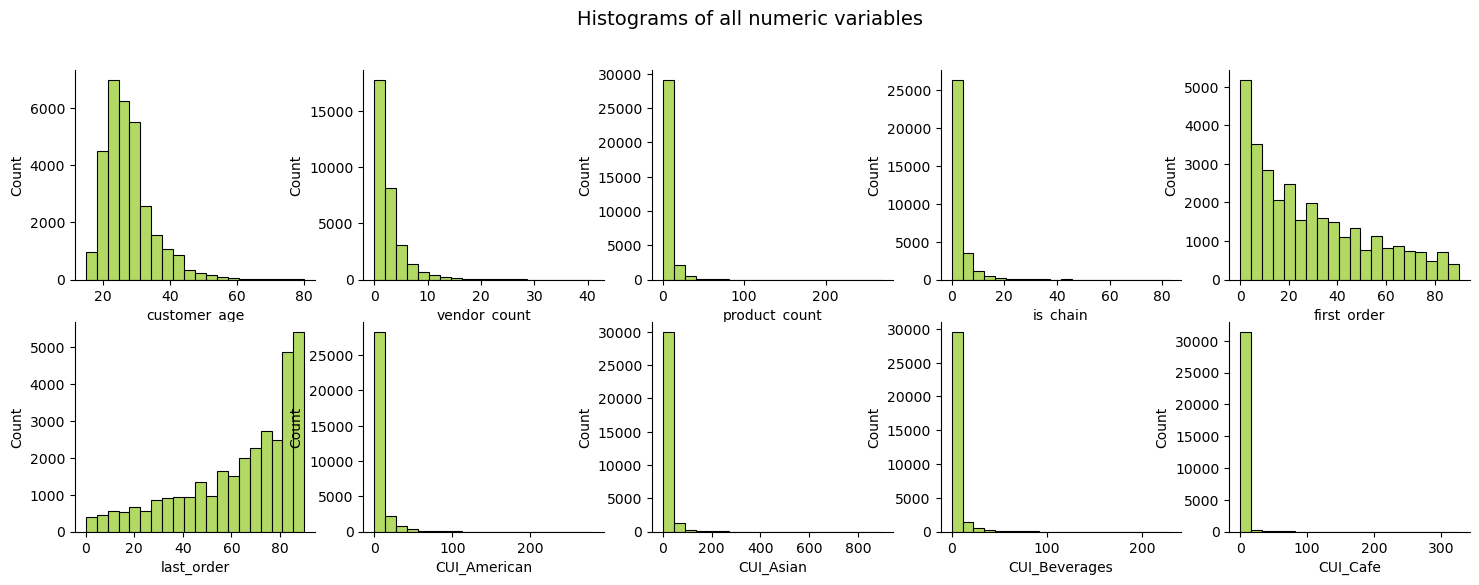

In [53]:
# HISTOGRAM (ALL NUMERIC VARIABLES)

# Draw
fig, ax = plt.subplots(2, 5, figsize=(18,6))
for var, subplot in zip(data[metric_features], ax.flatten()):
    g = sns.histplot(data=data,
                bins=20,
                 x=var,
                 ax=subplot,
                 color="yellowgreen",
                 kde=False)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Histograms of all numeric variables", fontsize=plots_Title_fontSize);

# Source: professor's notebook

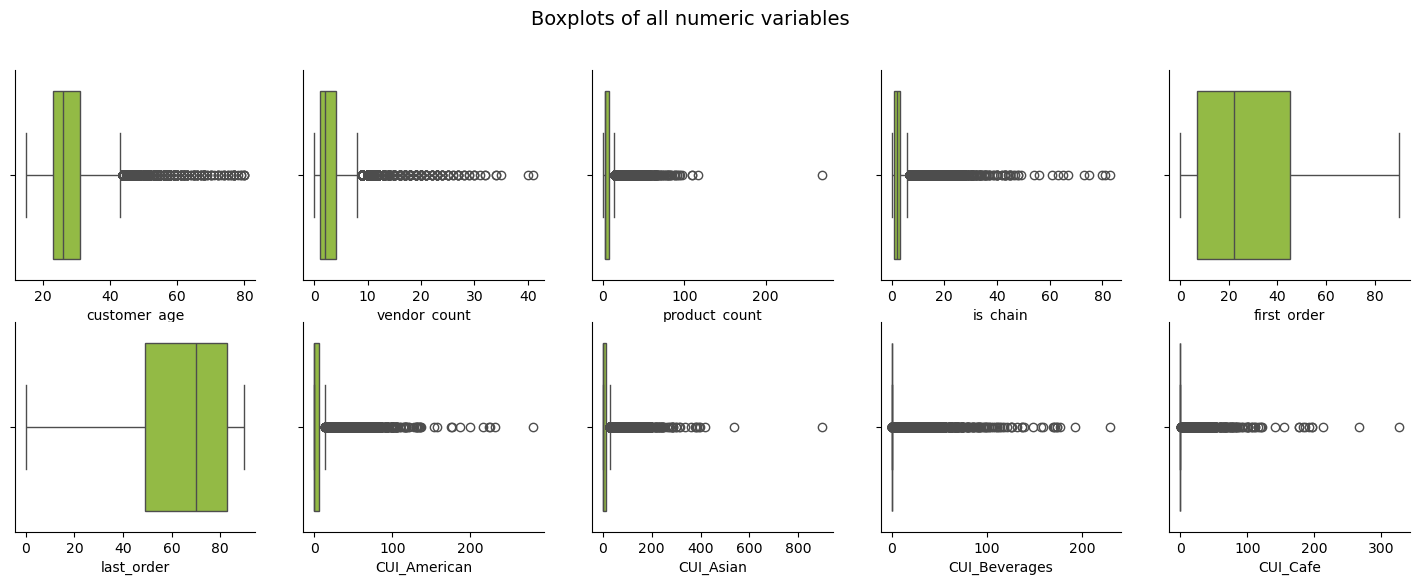

In [55]:
# BOXPLOT (ALL NUMERIC VARIABLES)

# Draw
fig, ax = plt.subplots(2, 5, figsize=(18,6))
for var, subplot in zip(data[metric_features], ax.flatten()):
    g = sns.boxplot(data=data,
                 x=var,
                 ax=subplot,
                 color="yellowgreen")

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Boxplots of all numeric variables", fontsize=plots_Title_fontSize);

# Source: professor's notebook

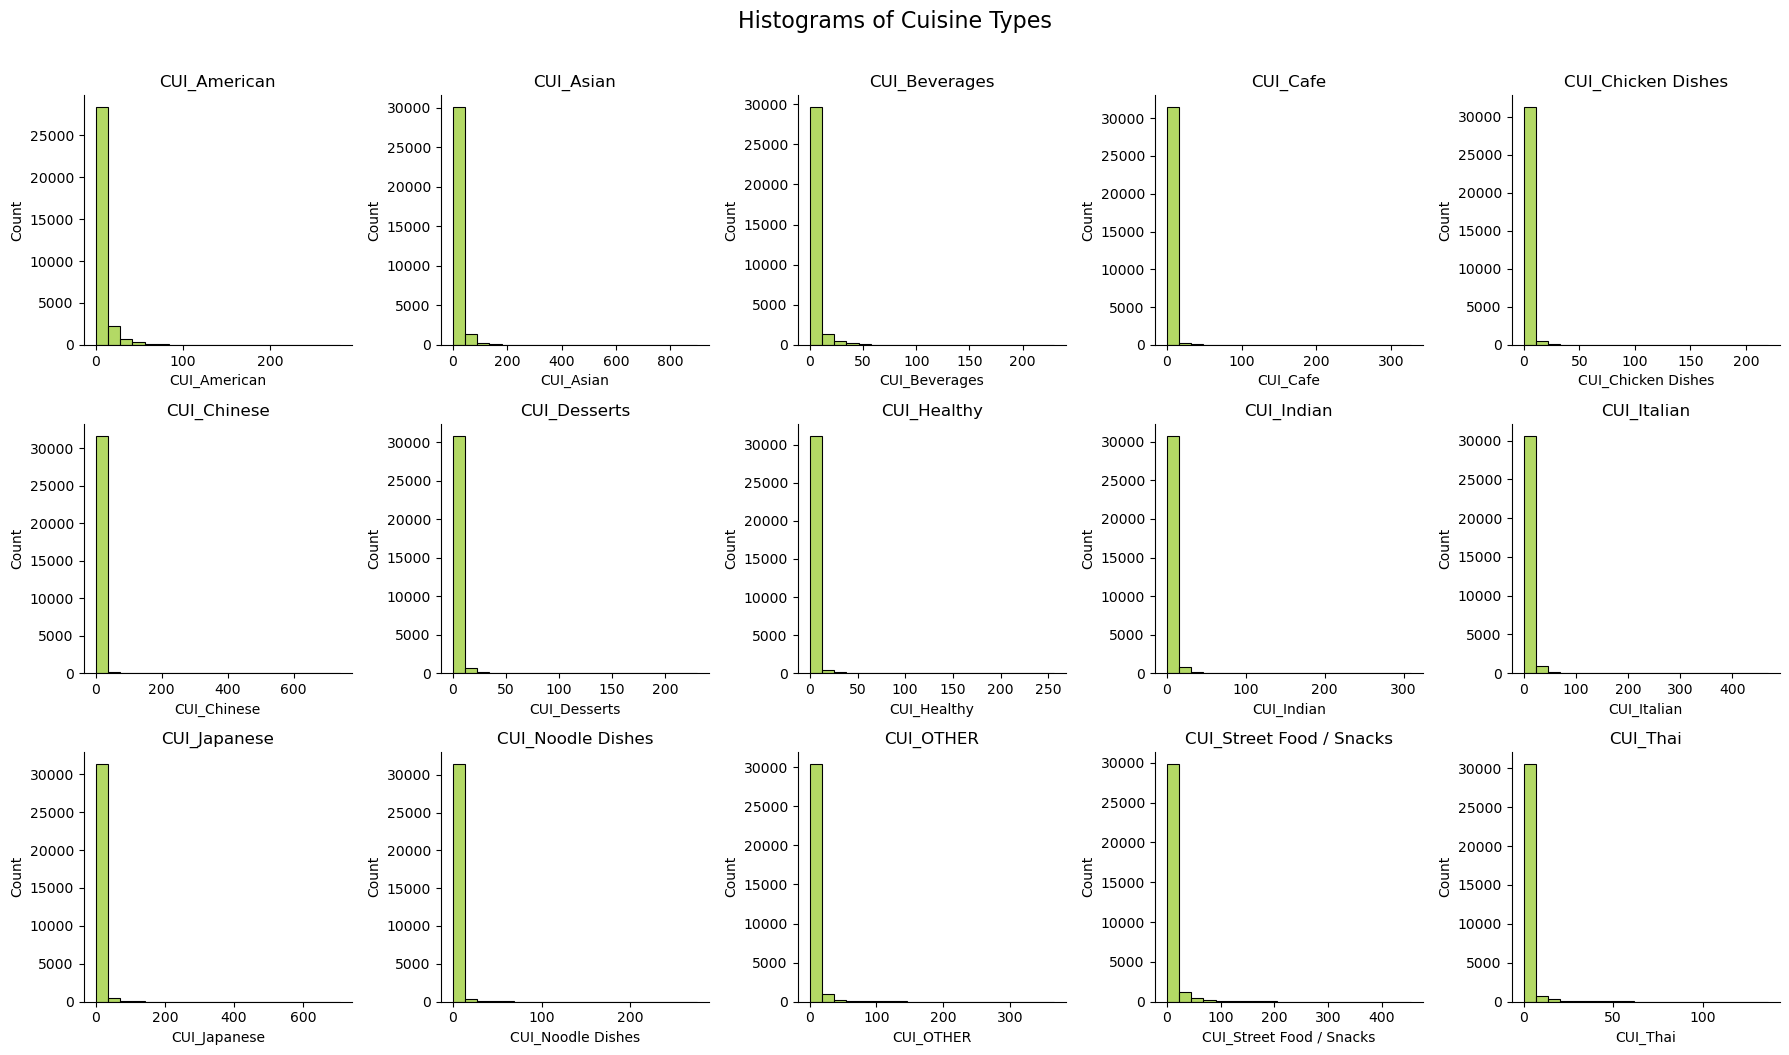

In [57]:

# Lista com as colunas de tipos de cozinha
cuisine_features = [
    'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
    'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
    'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
    'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai'
]

# Criação dos subplots
fig, ax = plt.subplots(3, 5, figsize=(18, 10))  # 3 linhas e 5 colunas para acomodar 15 gráficos
for var, subplot in zip(cuisine_features, ax.flatten()):
    sns.histplot(data=data, bins=20, x=var, ax=subplot, color="yellowgreen", kde=False)
    subplot.set_title(var)

# Configurações de decoração
sns.despine()
plt.tight_layout()
fig.suptitle("Histograms of Cuisine Types", fontsize=16, y=1.05)  # Título geral do gráfico

# Exibir gráfico
plt.show()


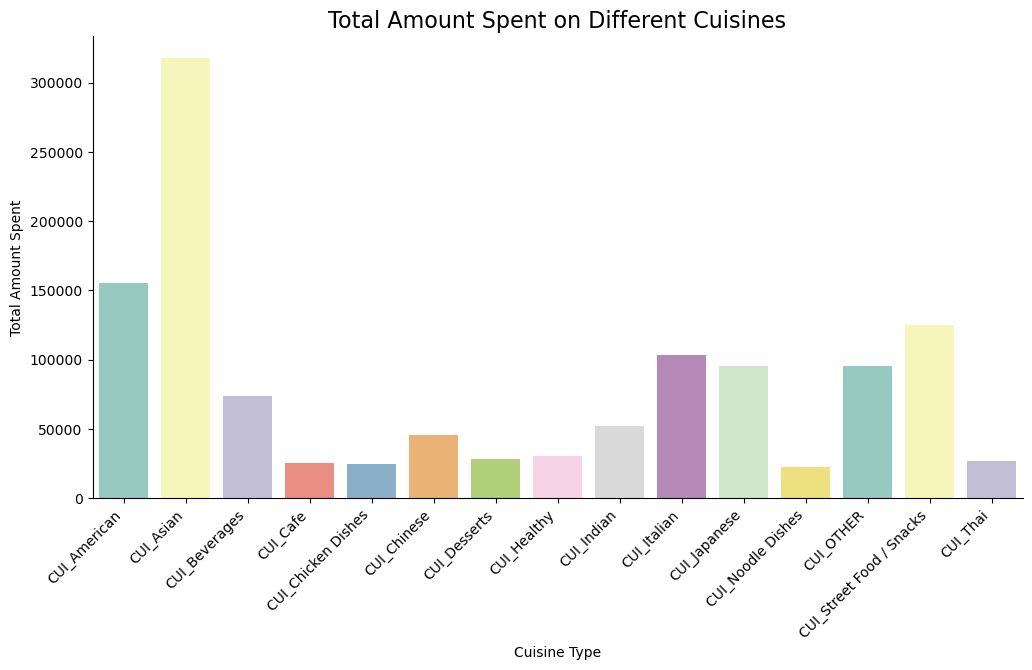

In [63]:
# List of cuisine type columns
cuisine_features = [
    'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
    'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
    'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
    'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai'
]

# Sum of the values for each cuisine type
cuisine_totals = data[cuisine_features].sum()

# Creating the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_totals.index, y=cuisine_totals.values, palette="Set3")

# Title and decoration
plt.title("Total Amount Spent on Different Cuisines", fontsize=16)
plt.xlabel("Cuisine Type")
plt.ylabel("Total Amount Spent")
plt.xticks(rotation=45, ha='right')  # Rotates the category labels for better readability
sns.despine()

# Show the plot
plt.show()

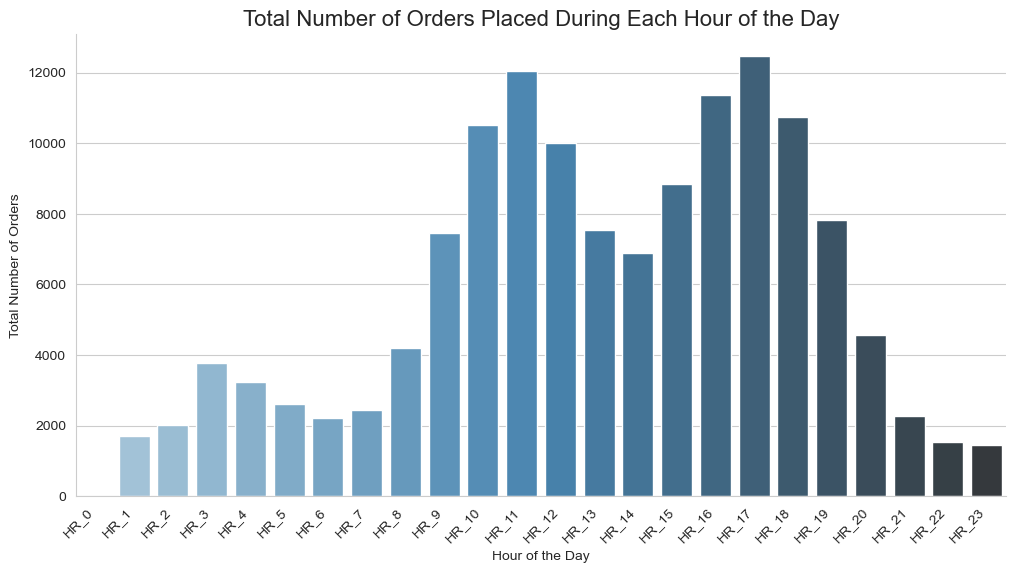

In [67]:
# List of hour columns
hour_features = [
    'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 
    'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 
    'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'
]

# Sum of the orders for each hour
hour_totals = data[hour_features].sum()

# Creating the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=hour_totals.index, y=hour_totals.values, palette="Blues_d")

# Title and labels
plt.title("Total Number of Orders Placed During Each Hour of the Day", fontsize=16)
plt.xlabel("Hour of the Day")
plt.ylabel("Total Number of Orders")
plt.xticks(rotation=45, ha='right')  # Rotate the hour labels for better readability
sns.despine()

# Display the plot
plt.show()


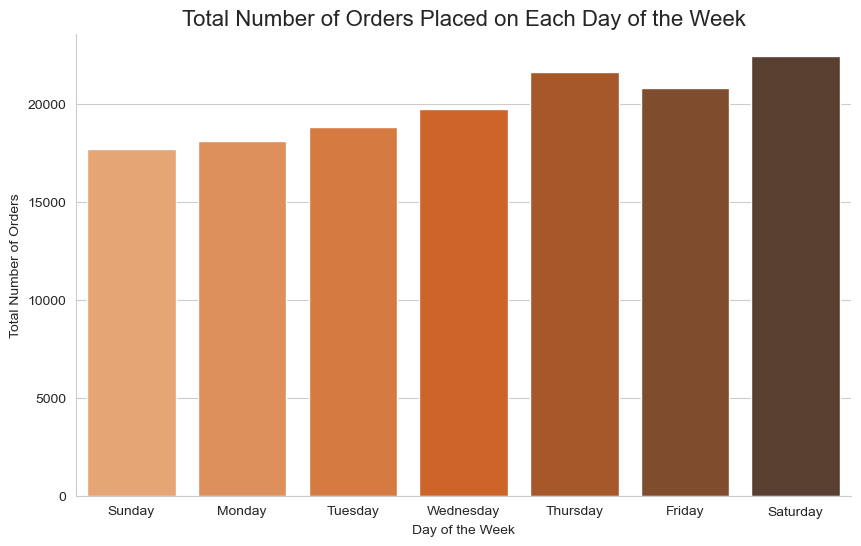

In [69]:
# List of day of the week columns
dow_features = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']

# Sum of the orders for each day of the week
dow_totals = data[dow_features].sum()

# Creating the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
            y=dow_totals.values, palette="Oranges_d")

# Title and labels
plt.title("Total Number of Orders Placed on Each Day of the Week", fontsize=16)
plt.xlabel("Day of the Week")
plt.ylabel("Total Number of Orders")
sns.despine()

# Display the plot
plt.show()


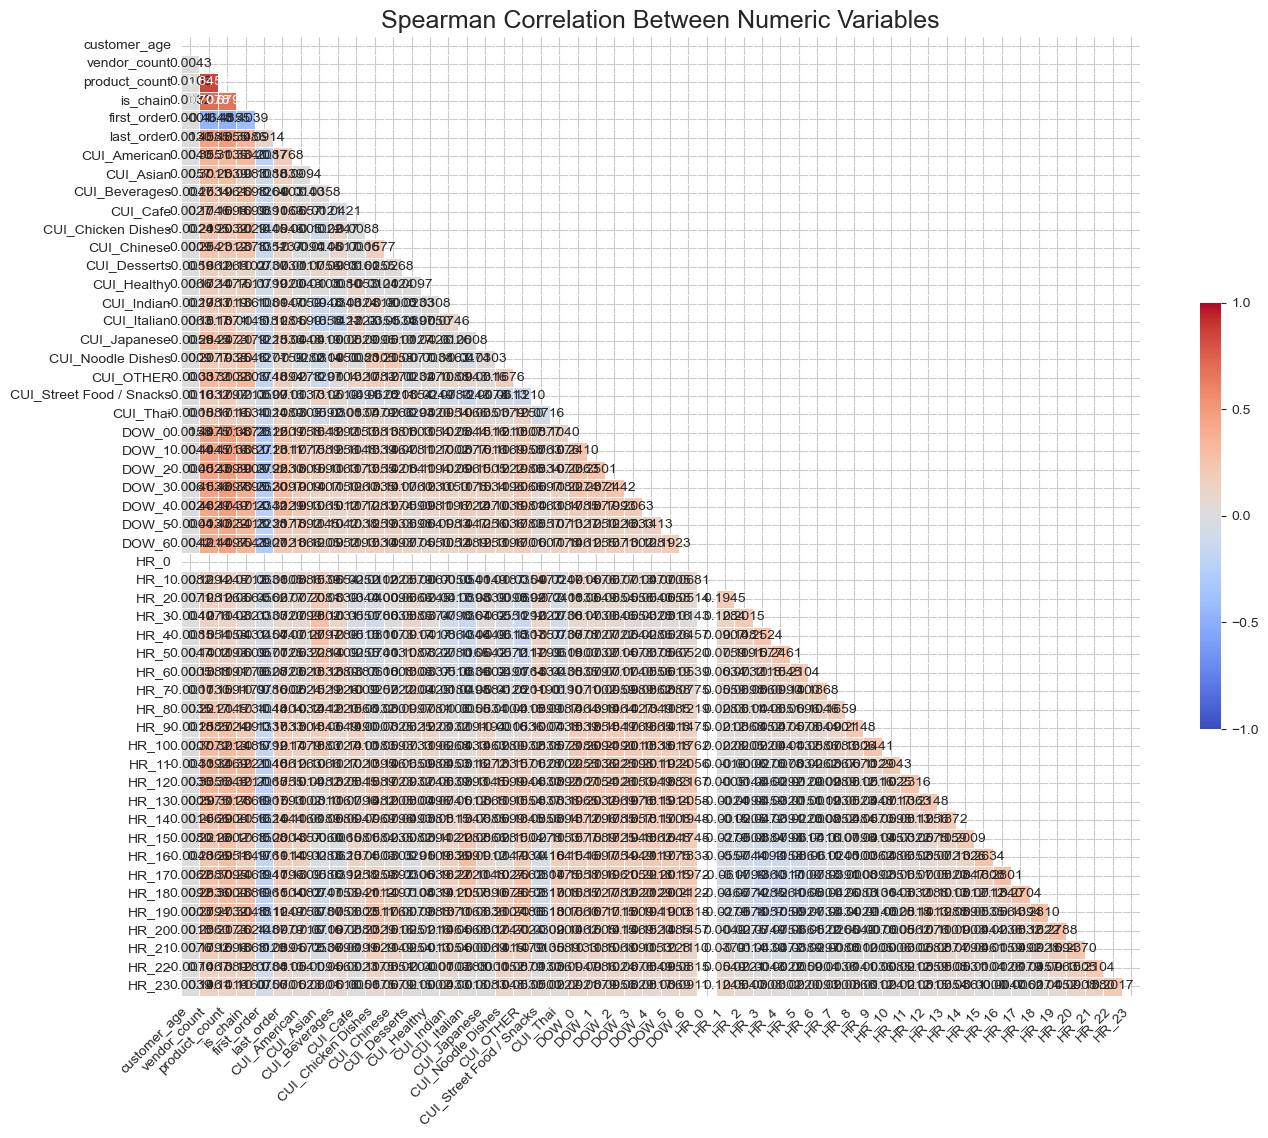

In [81]:
# CORRELATION

# Calculate the Spearman correlation
corr = data[metric_features].corr(method='spearman')

# Create a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Create the figure
plt.figure(figsize=(14, 12))  # Adjust the figure size for better visibility
heatmap = sns.heatmap(corr,
                       mask=mask,
                       square=True,
                       linewidths=.5,
                       cmap='coolwarm',
                       cbar_kws={'shrink': .4, 'ticks': [-1, -.5, 0, 0.5, 1]},
                       fmt='.4f',
                       vmin=-1,
                       vmax=1,
                       annot=True,
                       annot_kws={'size': 10})  # Font size for annotated values

# Set axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)  # X-axis labels
plt.yticks(rotation=0, fontsize=10)  # Y-axis labels

# Title and style
plt.title("Spearman Correlation Between Numeric Variables", fontsize=18)
sns.set_style('whitegrid')  # Set the style of the plot

# Display the plot
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()